In [1]:
import bmi.wrapper
import matplotlib.pyplot as plt
import logging
import numpy as np

%matplotlib inline
logger = logging.getLogger('notebook')


In [2]:
model = bmi.wrapper.BMIWrapper('../src/libcama.so')
model.set_logger(logger)
model.initialize("../../test_Elbe/CMF_Elbe/")


In [3]:
for i in range(50): # This number means total days
    model.update(86400) # 86400 means Adaptive Time Step setting; see L 29 in CMF_ELBE/generate_namfile.sh 
#    model.update(10)

In [4]:
def reshape_vars(var):
    var_shape = var.shape[::-1]
    var_reshaped = var.reshape(var_shape)
    return var_reshaped

def show_vars(model, var_name):
    var = model.get_var(var_name)
    var_reshaped = reshape_vars(var)
    print('Shape: {}'.format(var_reshaped.shape))
    plt.title(var_name)
    plt.imshow(np.ma.masked_greater(var_reshaped, 1.e19))
    plt.colorbar()

Shape: (28, 40)


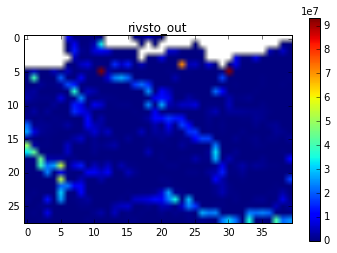

In [5]:
show_vars(model, 'rivsto_out')


Shape: (28, 40)


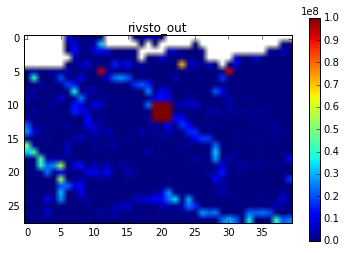

In [6]:
rivsto_out0 = reshape_vars(model.get_var('rivsto_out').copy())
rivsto_out = reshape_vars(model.get_var('rivsto_out'))

# add some extra water in the rivers
rivsto_out[10:13, 19:22] = 1e8
model.set_var('rivsto_out', rivsto_out.reshape(model.get_var_shape('rivsto_out')))
show_vars(model, 'rivsto_out')


Shape: (28, 40)


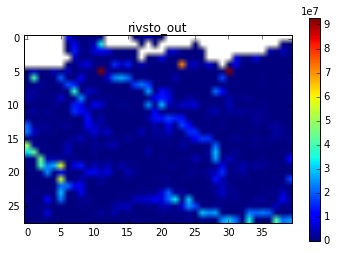

In [7]:
# run
for i in range(1):
    model.update(86400)
#     model.update(86400) 
show_vars(model, 'rivsto_out')

In [8]:
rivsto_out1 = reshape_vars(model.get_var('rivsto_out').copy())

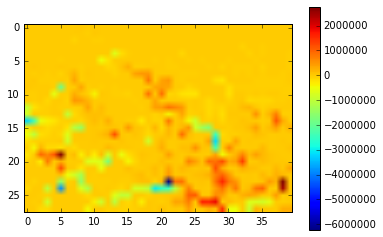

In [9]:
rivsto_dif = rivsto_out1 - rivsto_out0
plt.imshow(rivsto_dif)
plt.colorbar()

In [10]:
rivsto_dif[8:15, 17:24]

array([[ -1.16939062e+03,   8.24684000e+05,  -1.75397227e+04,
          3.83262000e+05,   4.93308000e+05,  -8.20717969e+03,
         -2.24052656e+04],
       [ -6.63113281e+02,  -1.49788867e+03,   3.61838000e+05,
          4.22879000e+05,   3.71461000e+05,  -7.94750000e+03,
         -3.04275488e+03],
       [ -2.60701355e+02,   8.86286000e+05,  -4.31296875e+02,
          9.32762000e+05,  -1.02214500e+05,  -7.75180000e+04,
         -1.98413500e+05],
       [ -2.88313782e+02,  -4.24631543e+03,   3.57310000e+05,
         -6.86869995e+02,  -4.79828247e+02,  -1.08082202e+03,
         -2.26249365e+03],
       [ -2.11849375e+04,   3.54075000e+04,   4.16453000e+05,
          4.75561000e+05,   8.43255000e+05,   6.74953000e+05,
          5.07405000e+05],
       [ -1.70960535e+03,  -6.78576416e+03,  -5.60227500e+04,
         -4.44308008e+03,  -4.16661000e+05,  -3.01804375e+04,
          3.54300000e+05],
       [ -2.65618000e+05,  -5.99274854e+03,  -5.14932500e+04,
         -4.92650000e+04,   8.07